### Исследование: "Зависимость: Год основания клуба - Количество очков на примере Испанской Примеры 2017-2018"

Source: [here](https://www.football-data.org).

In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, key):
    json = {}
    try:
        json = requests.get(uri, headers = {'X-Auth-Token': 'ebf90ecc5c564552bcf82160ef4a2faf'}).json()
        return json
    except:
        print(json)
        return None
# Создаю функцию для быстрого обращения api

In [4]:
teams = call_api('http://api.football-data.org/v2/competitions/2014/teams', 'teams')

In [5]:
teams_spain = []
founded =[]
for team in range(len(teams["teams"])):
    teams_spain .append(teams["teams"][team]["name"])
    founded.append(teams["teams"][team]["founded"])
# Достаю названия команд и их год основания. Связь между списками - их индексы.

In [6]:
table = call_api('http://api.football-data.org//v2/competitions/2014/standings', 'teams')

In [7]:
points = []
for team in teams_spain:
    for i in range(len(teams_spain)):
        if team == table['standings'][0]["table"][i]["team"]["name"]:
            points.append(table['standings'][0]["table"][i]["points"])
            continue
# Достаю очки. Связь так же по средствам индексов.

In [8]:
team_for_pd  = []
for i in range(len(teams_spain)):
    temp = {}
    temp["name"] = teams_spain[i]
    temp["founded"] = founded[i]
    temp["points"] = points[i]
    team_for_pd.append(temp)
# Обьединяю данных для датафрейма

In [9]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,founded,name,points
0,1898,Athletic Club,43
1,1903,Club Atlético de Madrid,79
2,1900,RCD Espanyol de Barcelona,49
3,1899,FC Barcelona,93
4,1946,Getafe CF,55
5,1933,Málaga CF,20
6,1902,Real Madrid CF,76
7,1909,Levante UD,46
8,1907,Real Betis Balompié,60
9,1903,Real Sociedad de Fútbol,49


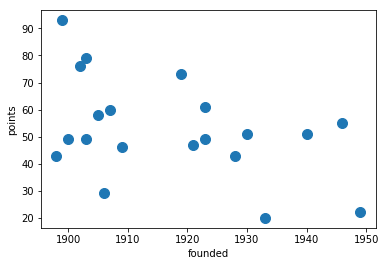

In [10]:
teams_pd.plot.scatter(x='founded', y='points', s=100)
# Взаимосвязь года основания и набранных очков

In [11]:
del  teams_pd ['name']
teams_pd

,founded,points
0,1898,43
1,1903,79
2,1900,49
3,1899,93
4,1946,55
5,1933,20
6,1902,76
7,1909,46
8,1907,60
9,1903,49


In [12]:
whitened = whiten(teams_pd.as_matrix())
whitened

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[119.43013512,   2.42043307],
       [119.74475613,   4.44684215],
       [119.55598352,   2.75816792],
       [119.49305932,   5.23489013],
       [122.45049681,   3.09590276],
       [121.63248218,   1.12578282],
       [119.68183193,   4.27797473],
       [120.12230134,   2.58930049],
       [119.99645294,   3.37734847],
       [119.74475613,   2.75816792],
       [121.00324017,   3.43363761],
       [120.75154336,   4.1091073 ],
       [120.87739176,   2.64558963],
       [122.63926941,   1.23836111],
       [122.0729516 ,   2.8707462 ],
       [121.44370958,   2.8707462 ],
       [121.00324017,   2.75816792],
       [119.87060453,   3.26477019],
       [119.93352873,   1.63238509],
       [121.31786117,   2.42043307]])

In [13]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[121.60451587,   2.49548526],
        [119.91779768,   4.51720358],
        [119.80768033,   2.68579616]]),
 array([2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0]))

In [14]:
colors_map  = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'b',
 'g',
 'r',
 'r',
 'g',
 'b',
 'b',
 'b',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r']

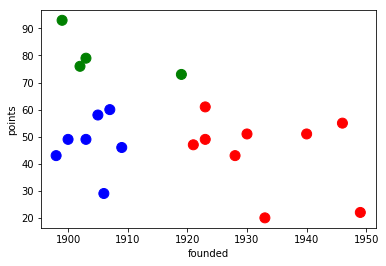

In [15]:
teams_pd.plot.scatter(x='founded', y='points', c=colors, s=100)
# Разбиваю на 3 кластера

In [16]:
centroidscentroid , cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

E:\anaconda3\lib\site-packages\scipy\cluster\vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[121.60451587,   2.49548526],
        [119.91779768,   4.51720358],
        [119.80768033,   2.68579616]]),
 array([3, 0, 2, 0, 4, 4, 0, 2, 2, 2, 1, 0, 1, 4, 4, 1, 1, 2, 3, 1]))

In [17]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'r',
 'b',
 'r',
 'm',
 'm',
 'r',
 'b',
 'b',
 'b',
 'g',
 'r',
 'g',
 'm',
 'm',
 'g',
 'g',
 'b',
 'y',
 'g']

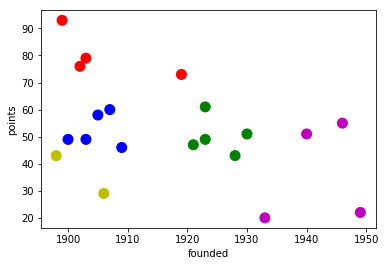

In [18]:
teams_pd.plot.scatter(x='founded', y='points', c=colors, s=100)
# Разбиваю на 5 кластеров